In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image

In [2]:
malignant_files = "dataset/Malignant"
normal_files = "dataset/Normal"

In [3]:
def load_images_from_folder(folder, label, img_size=(150, 150)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize image
            images.append(img)
            labels.append(label)
    return images, labels

In [4]:
malignant_images, malignant_labels = load_images_from_folder(malignant_files, 1)
normal_images, normal_labels = load_images_from_folder(normal_files, 0)

# Combine data
images = np.array(malignant_images + normal_images)
labels = np.array(malignant_labels + normal_labels)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Normalize pixel values to [0, 1]
X_train = X_train / 255.0
X_val = X_val / 255.0


# Convert labels to one-hot encoding (if needed)
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

In [6]:
model = tf.keras.models.Sequential([
    Input(shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.5819 - loss: 0.8268 - val_accuracy: 0.6667 - val_loss: 0.8327
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.7209 - loss: 0.5776 - val_accuracy: 0.8462 - val_loss: 0.3304
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - accuracy: 0.9072 - loss: 0.2446 - val_accuracy: 0.9487 - val_loss: 0.1173
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.9548 - loss: 0.1035 - val_accuracy: 0.9795 - val_loss: 0.0630
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 175ms/step - accuracy: 0.9916 - loss: 0.0308 - val_accuracy: 0.9949 - val_loss: 0.0242


In [7]:
def preprocess_image(img_path, target_size=(150, 150)):
    """Load and preprocess a single image."""
    img = image.load_img(img_path, target_size=target_size)  # Load image with target size
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Class: Normal


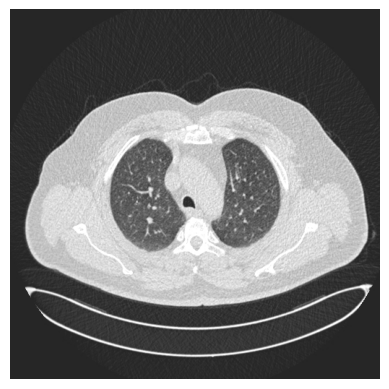

In [8]:
# Path to your test image
test_image_path = "dataset/test/n3.jpg"

# Preprocess the image
test_image = preprocess_image(test_image_path)

# Make predictions
predictions = model.predict(test_image)

# Get predicted class
predicted_class = np.argmax(predictions, axis=1)  # For binary classification

# Define class names if needed
class_names = ['Normal', 'Malignant']

# Print results
print(f"Predicted Class: {class_names[predicted_class[0]]}")

from PIL import Image
import matplotlib.pyplot as plt

# Define a function to display the image
def display_image(img_path):
    """Load and display an image."""
    img = Image.open(img_path)  # Load image
    plt.imshow(img)  # Display image
    plt.axis('off')  # Hide axes
    plt.show() 

display_image(test_image_path)

In [ ]:
model.save('model1.keras')